In [15]:
import pandas as pd

In [16]:
df_vistorias = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/V_VISTORIAS_EXECUTADAS_202510141605.csv')
df_vistorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CD_MUNICIPIO                 6105 non-null   int64 
 1   SITUACAO_VISTORIA            6105 non-null   int64 
 2   SITUACAO_VISTORIA_DESCRICAO  6105 non-null   object
 3   DATA_EXECUCAO                6105 non-null   object
dtypes: int64(2), object(2)
memory usage: 190.9+ KB


In [17]:
df_municipios = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/ORGAO_EMPRESA_202510141615.csv')
df_municipios = df_municipios.rename(columns={'CD_ORGAO_EMPRESA': 'CD_MUNICIPIO', 'NM_ORGAO_EMPRESA': 'NM_MUNICIPIO'})
df_municipios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  473 non-null    int64 
 1   NM_MUNICIPIO  473 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [25]:
df_merged = pd.merge(
    df_vistorias,
    df_municipios,
    on='CD_MUNICIPIO',  # Coluna comum para o join
    how='left'         # Usa todas as linhas de df_vistoria e adiciona as colunas de df_municipios
)
df_vistorias = df_merged
df_vistorias.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CD_MUNICIPIO                 6105 non-null   int64 
 1   SITUACAO_VISTORIA            6105 non-null   int64 
 2   SITUACAO_VISTORIA_DESCRICAO  6105 non-null   object
 3   DATA_EXECUCAO                6105 non-null   object
 4   NM_MUNICIPIO                 6105 non-null   object
dtypes: int64(2), object(3)
memory usage: 238.6+ KB


In [ ]:
STATUS_APTO = 'APTO'
df_aptas = df_vistorias[df_vistorias['SITUACAO_VISTORIA_DESCRICAO'] == STATUS_APTO]
contagem_por_municipio = df_aptas.groupby('NM_MUNICIPIO').size().reset_index(name='QUANTIDADE_VISTORIAS_APTA')
contagem_por_municipio = contagem_por_municipio.sort_values(
    by='QUANTIDADE_VISTORIAS_APTA',
    ascending=False
)
print(contagem_por_municipio)

           NM_MUNICIPIO  QUANTIDADE_VISTORIAS_APTA
4        IPORÃ DO OESTE                       1124
3              DESCANSO                        922
10               MONDAÍ                        848
8          MAJOR VIEIRA                        270
0             AGUA DOCE                        173
1   BELA VISTA DO TOLDO                        114
5            IRACEMINHA                         75
12         TIMBÓ GRANDE                         38
9           MATOS COSTA                         23
6            ITAIÓPOLIS                          4
2              BELMONTE                          2
7            LUIZ ALVES                          1
11       OTACÍLIO COSTA                          1


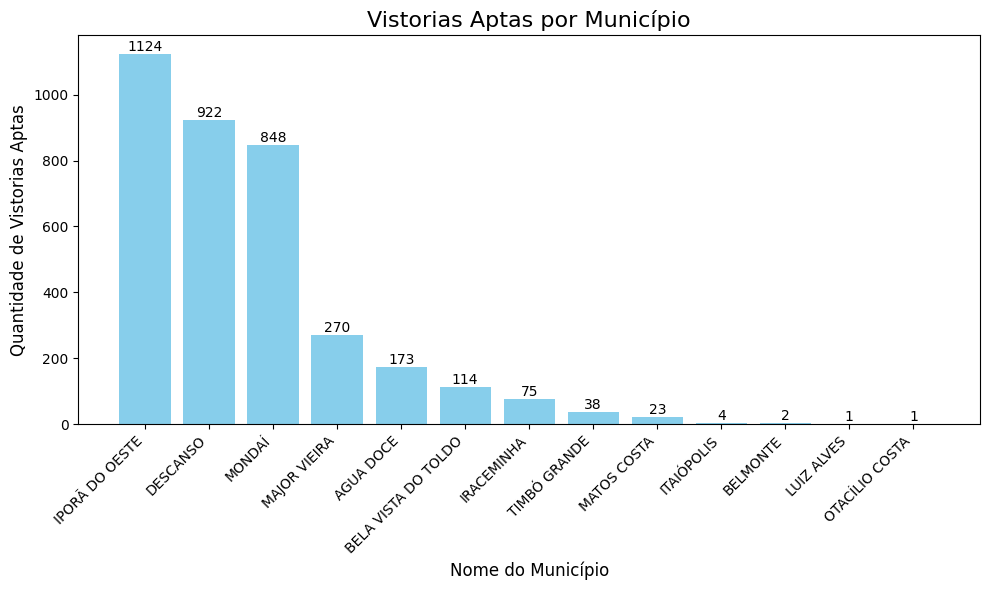

In [ ]:
import matplotlib.pyplot as plt

x_col = 'NM_MUNICIPIO'
y_col = 'QUANTIDADE_VISTORIAS_APTA'

plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
plt.bar(contagem_por_municipio[x_col], contagem_por_municipio[y_col], color='skyblue')

# Adiciona título e rótulos
plt.title('Vistorias Aptas por Município', fontsize=16)
plt.xlabel('Nome do Município', fontsize=12)
plt.ylabel('Quantidade de Vistorias Aptas', fontsize=12)

# Rotaciona os nomes dos municípios no eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona os valores nas barras (para clareza)
for i, v in enumerate(contagem_por_municipio[y_col]):
    # O '+ 0.1' ajusta a posição vertical do texto
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Ajusta o layout para evitar que rótulos sejam cortados
plt.tight_layout()

# Salva o gráfico em um arquivo
plt.savefig('vistorias_aptas_por_municipio.png')